In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

  Expertise Scenario Fault Condition  Decision
0  Operator     LOFW           Fault  1.000000
1  Operator     LOFW           Spoof  1.000000
2  Operator     SGTR           Fault  1.000000
3  Operator     SGTR           Spoof  0.916667
  Expertise Scenario Fault Condition  Decision
4   Student     LOFW           Fault  1.000000
5   Student     LOFW           Spoof  0.916667
6   Student     SGTR           Fault  1.000000
7   Student     SGTR           Spoof  0.333333


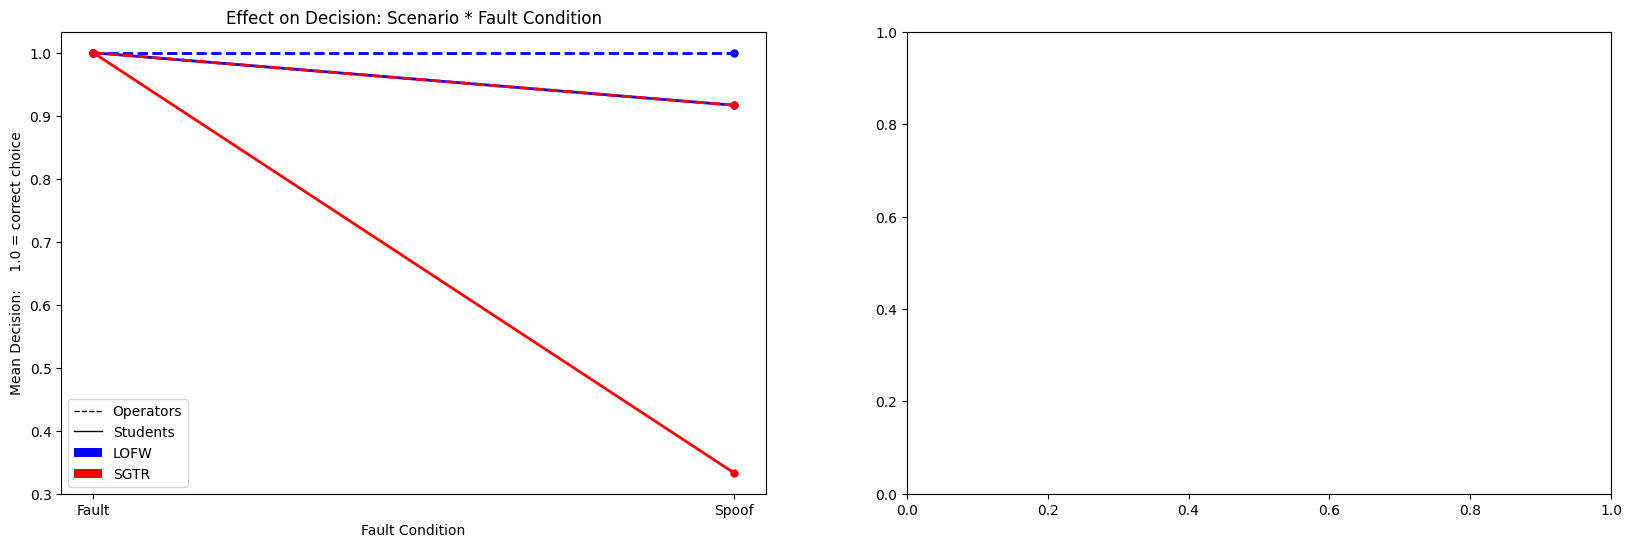

In [54]:
import matplotlib.pyplot as plt
import sys
import os
from IPython.display import display, Markdown

sys.path.append('plot') 

import chart

# Load the dataset
data_path = 'data/depend_only.csv'
data = chart.load_data(data_path)
# print(data.head())

# Prepare the data
group_iv = 'Expertise'
g1 = 'Operator'
g2 = 'Student'
iv1 = 'Scenario'
iv2 = 'Fault Condition'
dv1 = 'Decision'
operator, student, mean_scores_students = chart.prepare_data(data,group_iv,g1,g2,iv1,iv2,dv1)
print(operator.head())
print(student.head())

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plot using the specific axes
title1 = f"Effect on {dv1}: {iv1} * {iv2}"
y_mean = f"Mean {dv1}:    1.0 = correct choice"
chart.plot_interaction_scores(operator, student, y_mean, iv2, dv1, title1, ax=axs[0])
# chart.plot_mental_demand_scores(mean_scores_students, ax=axs[1])

# plt.tight_layout()
# plt.show()


##### **Figure 1.** A) Interaction of mental demand scores for both operators and student particpants for Normal and FATR conditions. B) Student mental demand in the Normal and FATR condtions.


Discussion: 

1. Operators vs Student mental demand scores trend in opposite directions than students based on scenario, and show overall lower mean scores (check for significance).
2. Mental demand scores compared for only the students between Normal and FATR condtion show lower mean scores, and trend similarly for scenarios (check for significance).



In [ ]:
from __future__ import print_function
from pyvttbl import DataFrame
from pyvttbl.stats import Anova
import pandas as pd

# -- pvttbl methods
df1 = DataFrame()
df1.read_tbl('depend_only.csv')

# Dep study pivots on expertise.
bfactor = "Expertise"


# df1.write(fname='test.csv')
# print(df)

# -- pandas
# df2 = pd.read_csv('SCORES.csv')
# print(df2.head())

In [ ]:

dv1_values = ['Diagnosis Time']

for dv1 in dv1_values:
    print(f"Running ANOVA for: {dv1}")
    
    aov = Anova()
    aov.run(df1, dv1, wfactors=['Scenario', 'Fault Condition'], bfactors=[bfactor])
    
    # this would be for between studies
    # aov.run(df, dv, bfactors=['Scenario', 'Fault Condition'])
    
    aov.truncate(test='gg')
    print(aov)
    print("\n\n")

# Need interaction plot: Scenario * Skill 
## Figures only for interactions

## main effects with means
# F(x,y) = f, p = p, MSE = 


In [ ]:
dv1_values = ['Decision']

for dv1 in dv1_values:
    print(f"Running ANOVA for: {dv1}")
    
    aov = Anova()
    aov.run(df1, dv1, wfactors=['Scenario', 'Fault Condition'], bfactors=[bfactor])
    
    # this would be for between studies
    # aov.run(df, dv, bfactors=['Scenario', 'Fault Condition'])
    
    aov.truncate(test='gg')
    print(aov)
    print("\n\n")

# Need interaction plot: Scenario * Skill 
## Figures only for interactions

## main effects with means
# F(x,y) = f, p = p, MSE = 


In [ ]:
dv1_values = ['Mental Demand', 'Temporal Demand','Performance','Effort','Frustration Level']
for dv1 in dv1_values:
    print(f"Running ANOVA for: {dv1}")
    
    aov = Anova()
    aov.run(df1, dv1, wfactors=['Scenario', 'Fault Condition'], bfactors=[bfactor])
    
    # this would be for between studies
    # aov.run(df, dv, bfactors=['Scenario', 'Fault Condition'])
    
    aov.truncate(test='gg')
    print(aov)
    print("\n\n")

# Need interaction plot: Scenario * Skill 
## Figures only for interactions

## main effects with means
# F(x,y) = f, p = p, MSE = 


In [ ]:
dv1 = "Mental Demand"
pt = df.pivot(dv1, ['Skill'], ['Scenario'])
print(pt)
print("\n\n")
pt = df.pivot(dv1, ['Fault Condition'], ['Scenario'])
print(pt)

In [ ]:
dv1 = "Temporal Demand"
pt = df.pivot(dv1, ['Skill'], ['Scenario'])
print(pt)
print("\n\n")
pt = df.pivot(dv1, ['Fault Condition'], ['Scenario'])
print(pt)

In [ ]:
dv1 = "Perform."
pt = df.pivot(dv1, ['Skill'], ['Scenario'])
print(pt)
print("\n\n")
pt = df.pivot(dv1, ['Fault Condition'], ['Scenario'])
print(pt)

In [ ]:
#df2 is a pandas dataframe.
filtered_df2 = df2[df2['Skill'] == 'Student']
#this works

#df is a pvttbl dataframe

df.where_update([('Skill', '=', "Student")])

### Multidemensional Pivot
```
df.read_tbl('suppression~subjectXgroupXageXcycleXphase.csv')

pt = df.pivot('SUPPRESSION',
                  rows=['CYCLE', 'PHASE'],
                  cols=['GROUP', 'AGE'])
print(pt)
```

In [ ]:
dv1 = "Perform."
pt = df.pivot(dv1, 
              rows=['Study', 'Skill'],
              cols=['Scenario', 'Fault Condition'])
print(pt)

In [ ]:
dv_values = ['Perform.', 'Mental Demand', 'Temporal Demand']

for dv in dv_values:
    print(f"Pivoting for: {dv}")
    pt = df.pivot(dv1, 
                  rows=['Study', 'Skill'],
                  cols=['Scenario', 'Fault Condition'])
    print(pt)
    print("\n\n")  # Print a separator for readability


In [ ]:

# import pyvttbl
# DF = Fatr only
df = DataFrame()
df.read_tbl('student_data.csv')

# dv_values = ['Perform.', 'Mental Demand', 'Temporal Demand','Cooper Harper', 'Action Logic']
dv_values = ['Cooper Harper', 'Action Logic']

for dv in dv_values:
    print(f"Running ANOVA for: {dv}")
    
    aov = Anova()
    aov.run(df, dv, wfactors=['Scenario', 'Fault Condition'], bfactors=['Study'])
    
    # this would be for between studies
    # aov.run(df, dv, bfactors=['Scenario', 'Fault Condition'])
    
    aov.truncate(test='gg')
    print(aov)
    print("\n\n")


In [ ]:
# dv_values = ['Perform.', 'Mental Demand', 'Temporal Demand','Cooper Harper', 'Action Logic']
df2 = DataFrame()
df2.read_tbl('depend.csv')
dv2_values = ['Temporal Demand']

for dv in dv2_values:
    print(f"Running ANOVA for: {dv}")
    
    aov = Anova()
    aov.run(df, dv, wfactors=['Scenario', 'Fault Condition'], bfactors=['Study'])
    
    # this would be for between studies
    # aov.run(df, dv, bfactors=['Scenario', 'Fault Condition'])
    
    aov.truncate(test='gg')
    print(aov)
    print("\n\n")

In [ ]:
# dv_values = ['Perform.', 'Mental Demand', 'Temporal Demand','Cooper Harper', 'Action Logic']
df2 = DataFrame()
df2.read_tbl('student_data.csv')
dv2_values = ['Diagnosis Time']

for dv in dv2_values:
    print(f"Running ANOVA for: {dv}")
    
    aov = Anova()
    aov.run(df2, dv, wfactors=['Scenario', 'Fault Condition'], bfactors=['Study'])
    
    # this would be for between studies
    # aov.run(df, dv, bfactors=['Scenario', 'Fault Condition'])
    
    aov.truncate(test='gg')
    print(aov)
    print("\n\n")

In [ ]:
# Dep Only
df2 = DataFrame()
df2.read_tbl('depend_only.csv')
dv2_values = ['Decision']

for dv in dv2_values:
    print(f"Running ANOVA for: {dv}")
    
    aov = Anova()
    aov.run(df2, dv, wfactors=['Scenario', 'Fault Condition'], bfactors=['Skill'])
    
    # this would be for between studies
    # aov.run(df, dv, bfactors=['Scenario', 'Fault Condition'])
    
    aov.truncate(test='gg')
    print(aov)
    print("\n\n")